# Exploratory Data Analysis of NBA Shot Data

## Step 3: Data Cleaning (Continued)

From part 2 we made some of the columns more clear and interpretable. We'll load the dataset below

In [35]:
import pandas as  pd

pd.set_option('display.max_columns', 30)

nba_step_3 = pd.read_csv('E:/Random_Projects/NBA-Stuff/data/shot_logs_clean_2.csv')

In [36]:
nba_step_3.head()

,Game Id,Date,Home Team,Away Team,Winning Team,W,Final Margin,Shot Number,Period,Game Clock,Shot Clock,Dribbles,Touch Time,Shot Dist,Pts Type,Shot Result,Closest Defender,Closest Defender Player Id,Close Def Dist,Fgm,Pts,Player Name,Player Id
0,21400899,2015-03-04,BKN,CHA,CHA,W,24,1,1,1:09,10.8,2,1.9,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,2015-03-04,BKN,CHA,CHA,W,24,2,1,0:14,3.4,0,0.8,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,2015-03-04,BKN,CHA,CHA,W,24,3,1,0:00,NaN,3,2.7,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,2015-03-04,BKN,CHA,CHA,W,24,4,2,11:47,10.3,2,1.9,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,2015-03-04,BKN,CHA,CHA,W,24,5,2,10:34,10.9,2,2.7,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


Since we were able to extract the winning team in the third column, we don't really need the W column anymore and can remove it

In [37]:
nba_step_3.drop('W', axis='columns', inplace=True)

nba_step_3.head()

,Game Id,Date,Home Team,Away Team,Winning Team,Final Margin,Shot Number,Period,Game Clock,Shot Clock,Dribbles,Touch Time,Shot Dist,Pts Type,Shot Result,Closest Defender,Closest Defender Player Id,Close Def Dist,Fgm,Pts,Player Name,Player Id
0,21400899,2015-03-04,BKN,CHA,CHA,24,1,1,1:09,10.8,2,1.9,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,2015-03-04,BKN,CHA,CHA,24,2,1,0:14,3.4,0,0.8,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,2015-03-04,BKN,CHA,CHA,24,3,1,0:00,NaN,3,2.7,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,2015-03-04,BKN,CHA,CHA,24,4,2,11:47,10.3,2,1.9,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,2015-03-04,BKN,CHA,CHA,24,5,2,10:34,10.9,2,2.7,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


Now we're going to focus on handling the missing values in the shot clock column and how to impute those values. For the sake of ease of interpretation, we will get do the following

1. Get the list of unique game IDs
2. Use Numpy's random module to get 10 random game IDs
3. Filter data frame on these game IDs

For the sake of replicability, the seed is set to 42 (because...42. If you want to experiment and are not worried about a difference in results, feel free to not set the seed or to whatever seed you want and continue)


In [38]:
import numpy as np

Game_ID_List = nba_step_3['Game Id'].unique()

np.random.seed(42)

random_10_game_ids = np.random.choice(Game_ID_List, size=10)

In [39]:
Ten_Games = nba_step_3[nba_step_3["Game Id"].isin(random_10_game_ids)]

Ten_Games.sort_values('Game Id', inplace = True)

Ten_Games.reset_index(drop=True, inplace=True)

print(random_10_game_ids)

Ten_Games

C:\Users\Test\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


[21400314 21400227 21400505 21400301 21400251 21400812 21400378 21400549
 21400357 21400037]


,Game Id,Date,Home Team,Away Team,Winning Team,Final Margin,Shot Number,Period,Game Clock,Shot Clock,Dribbles,Touch Time,Shot Dist,Pts Type,Shot Result,Closest Defender,Closest Defender Player Id,Close Def Dist,Fgm,Pts,Player Name,Player Id
0,21400037,2014-11-01,UTA,PHX,UTA,27,12,2,4:07,5.2,1,2.3,2.4,2,missed,"Len, Alex",203458,1.2,0,0,derrick favors,202324
1,21400037,2014-11-01,UTA,PHX,UTA,27,5,3,9:14,14.4,0,1.8,3.2,2,made,"Morris, Markieff",202693,2.9,1,2,trevor booker,202344
2,21400037,2014-11-01,UTA,PHX,UTA,27,6,4,9:04,17.4,0,1.0,24.8,3,missed,"Morris, Markieff",202693,6.9,0,0,trevor booker,202344
3,21400037,2014-11-01,UTA,PHX,UTA,27,7,4,8:35,24.0,0,0.0,1.1,2,made,"Green, Gerald",101123,1.1,1,2,trevor booker,202344
4,21400037,2014-11-01,UTA,PHX,UTA,27,8,4,7:00,2.6,2,2.4,3.9,2,made,"Morris, Marcus",202694,2.7,1,2,trevor booker,202344
5,21400037,2014-11-01,UTA,PHX,UTA,27,9,4,4:53,21.6,2,2.8,5.4,2,made,"Plumlee, Miles",203101,8.8,1,2,trevor booker,202344
6,21400037,2014-11-01,UTA,PHX,UTA,27,1,1,9:12,4.9,0,0.8,24.5,3,missed,"Morris, Markieff",202693,3.7,0,0,enes kanter,202683
7,21400037,2014-11-01,UTA,PHX,UTA,27,4,3,10:41,23.0,0,1.5,3.0,2,made,"Plumlee, Miles",203101,3.4,1,2,trevor booker,202344
8,21400037,2014-11-01,UTA,PHX,UTA,27,2,1,6:24,14.4,0,1.6,6.1,2,missed,"Morris, Markieff",202693,1.6,0,0,enes kanter,202683
9,21400037,2014-11-01,UTA,PHX,UTA,27,1,1,8:47,8.4,0,1.2,0.5,2,made,"Plumlee, Miles",203101,0.4,1,2,derrick favors,202324


You'll notice pandas give a warning that we're manipulating a copy of the original data frame and that original will not change. Since the intention for this step is not to change the original data frame then this is fine. Now we'll subset this data based on whether the shot clock data is missing to analyze a pattern

In [40]:
missing_shot_clock = Ten_Games[Ten_Games['Shot Clock'].isnull()]

missing_shot_clock.head(20)

,Game Id,Date,Home Team,Away Team,Winning Team,Final Margin,Shot Number,Period,Game Clock,Shot Clock,Dribbles,Touch Time,Shot Dist,Pts Type,Shot Result,Closest Defender,Closest Defender Player Id,Close Def Dist,Fgm,Pts,Player Name,Player Id
33,21400037,2014-11-01,UTA,PHX,UTA,27,14,3,0:05,NaN,1,1.5,5.9,2,missed,"Len, Alex",203458,1.2,0,0,gordon hayward,202330
43,21400037,2014-11-01,UTA,PHX,UTA,27,9,2,0:02,NaN,0,0.7,23.1,3,missed,"Len, Alex",203458,18.5,0,0,trey burke,203504
95,21400037,2014-11-01,UTA,PHX,UTA,-27,14,3,0:00,NaN,1,2.0,33.8,3,missed,"Hood, Rodney",203918,8.6,0,0,gerald green,101123
152,21400227,2014-11-28,TOR,DAL,DAL,-4,22,4,0:03,NaN,4,3.8,26.7,3,missed,"Barea, Jose Juan",200826,3.8,0,0,kyle lowry,200768
165,21400227,2014-11-28,TOR,DAL,DAL,-4,21,4,0:10,NaN,5,4.8,4.2,2,made,"Crowder, Jae",203109,0.0,1,2,kyle lowry,200768
196,21400227,2014-11-28,TOR,DAL,DAL,4,11,2,0:02,NaN,18,15.3,21.2,2,missed,"Ross, Terrence",203082,3.9,0,0,mnta ellis,101145
252,21400227,2014-11-28,TOR,DAL,DAL,-4,10,3,0:00,NaN,15,15.5,25.8,3,missed,"Ellis, Monta",101145,2.2,0,0,lou williams,101150
273,21400227,2014-11-28,TOR,DAL,DAL,-4,20,4,0:17,NaN,5,4.5,3.2,2,made,"Parsons, Chandler",202718,5.2,1,2,kyle lowry,200768
341,21400251,2014-12-01,UTA,DEN,DEN,-2,9,3,0:04,NaN,0,1.0,24.3,3,made,"Harris, Gary",203914,6.4,1,3,trey burke,203504
368,21400251,2014-12-01,UTA,DEN,DEN,-2,18,4,0:02,NaN,1,1.8,26.3,3,missed,"Chandler, Wilson",201163,5.4,0,0,gordon hayward,202330


So, some basketball knowledge (for those unfamiliar). The shot clock runs for 24 seconds on any given play. Why is this important? Take a look at game clock. Immediately, you'll notice the following

* **The game clock in the head of the data above seems to run under 24 seconds**

Why does that matter? If the game clock is under 24 seconds, the game clock = shot clock! Which may explain why the data is missing But let's verify by plotting the distribution of the time patterns for this data (using pandas native plotting features)

In [41]:
from matplotlib import pyplot as plt
%matplotlib inline  

missing_shot_clock.loc[:,'Game Clock'] = pd.to_datetime(missing_shot_clock['Game Clock'], format="%M:%S").dt.time

missing_shot_clock

C:\Users\Test\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Game Id,Date,Home Team,Away Team,Winning Team,Final Margin,Shot Number,Period,Game Clock,Shot Clock,Dribbles,Touch Time,Shot Dist,Pts Type,Shot Result,Closest Defender,Closest Defender Player Id,Close Def Dist,Fgm,Pts,Player Name,Player Id
33,21400037,2014-11-01,UTA,PHX,UTA,27,14,3,00:00:05,NaN,1,1.5,5.9,2,missed,"Len, Alex",203458,1.2,0,0,gordon hayward,202330
43,21400037,2014-11-01,UTA,PHX,UTA,27,9,2,00:00:02,NaN,0,0.7,23.1,3,missed,"Len, Alex",203458,18.5,0,0,trey burke,203504
95,21400037,2014-11-01,UTA,PHX,UTA,-27,14,3,00:00:00,NaN,1,2.0,33.8,3,missed,"Hood, Rodney",203918,8.6,0,0,gerald green,101123
152,21400227,2014-11-28,TOR,DAL,DAL,-4,22,4,00:00:03,NaN,4,3.8,26.7,3,missed,"Barea, Jose Juan",200826,3.8,0,0,kyle lowry,200768
165,21400227,2014-11-28,TOR,DAL,DAL,-4,21,4,00:00:10,NaN,5,4.8,4.2,2,made,"Crowder, Jae",203109,0.0,1,2,kyle lowry,200768
196,21400227,2014-11-28,TOR,DAL,DAL,4,11,2,00:00:02,NaN,18,15.3,21.2,2,missed,"Ross, Terrence",203082,3.9,0,0,mnta ellis,101145
252,21400227,2014-11-28,TOR,DAL,DAL,-4,10,3,00:00:00,NaN,15,15.5,25.8,3,missed,"Ellis, Monta",101145,2.2,0,0,lou williams,101150
273,21400227,2014-11-28,TOR,DAL,DAL,-4,20,4,00:00:17,NaN,5,4.5,3.2,2,made,"Parsons, Chandler",202718,5.2,1,2,kyle lowry,200768
341,21400251,2014-12-01,UTA,DEN,DEN,-2,9,3,00:00:04,NaN,0,1.0,24.3,3,made,"Harris, Gary",203914,6.4,1,3,trey burke,203504
368,21400251,2014-12-01,UTA,DEN,DEN,-2,18,4,00:00:02,NaN,1,1.8,26.3,3,missed,"Chandler, Wilson",201163,5.4,0,0,gordon hayward,202330


In [86]:
times = np.array(missing_shot_clock['Game Clock'])

seconds = np.zeros(times.shape)

for x,y in np.ndenumerate(seconds):
    seconds[x[0]] = times[x[0]].second

print(seconds)

[  5.   2.   0.   3.  10.   2.   0.  17.   4.   2.   0.   0.   1.   1.   3.
   3.   9.   3.   7.   4.  17.   1.   7.   2.   0.  12.   3.   6.  14.   0.
  21.   0.   5.   3.  16.   3.   1.   7.  21.   3.   5.   2.]


NameError: name 'ax' is not defined

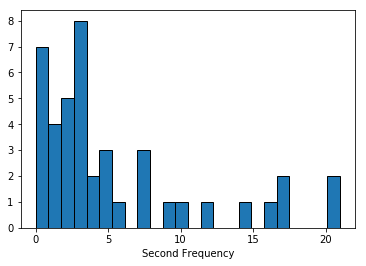

In [94]:
plt.hist(seconds, edgecolor='black', linewidth=1, bins = 24)

plt.xlabel('Second Frequency')
plt.show()
ax.set_xticklabels